In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from shallowAE import ShallowAE
from sparseShallowAE import SparseShallowAE_KL, SparseShallowAE_L1, SparseShallowAE_KL_sum
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [3]:
FILE_PATH = "../"
path_to_kl_div_sum = "../ShallowAE/Sparse/KL_div_sum/"
x_test, y_test, x_small, _ = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=True)
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


# 1. One Input Channel

In [4]:
pd.read_csv("../ShallowAE/Simple/TestOutputs/18_08_13results")

,Unnamed: 0,SVM_best_C,SVM_best_gamma,SVM_classification_score,dimension,test_error,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_error,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,5.994843,0.599484,0.864,100,0.006974,18.235803,18.336649,0.067768,0.0069,18.235922,18.336009,0.067977


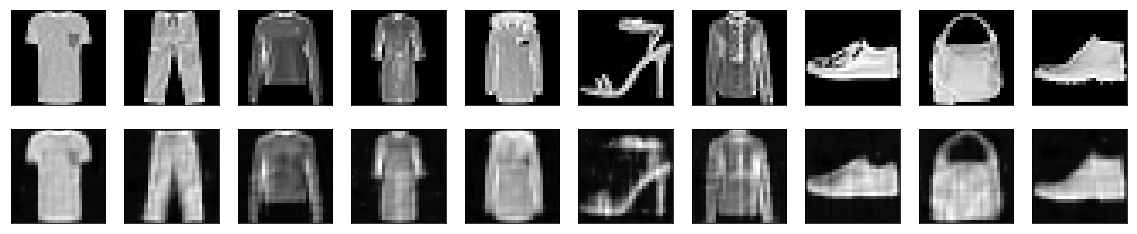

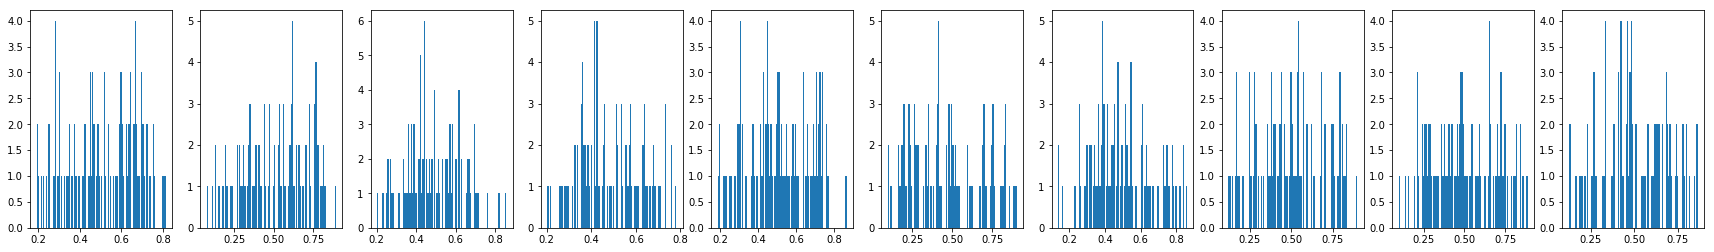

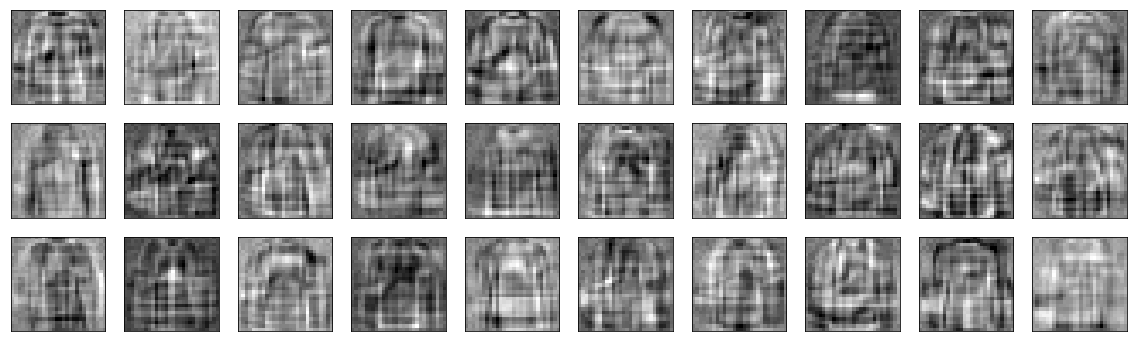

In [6]:
AE = ShallowAE.load('18_08_13_dim100.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

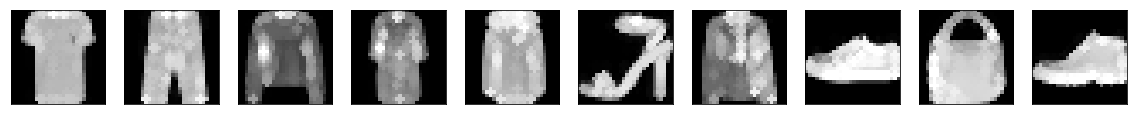

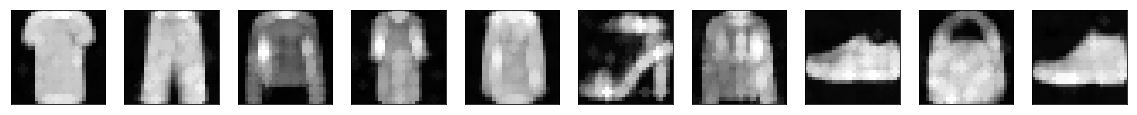

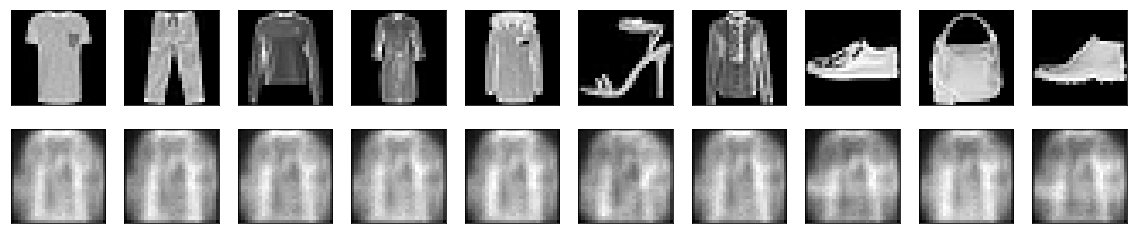

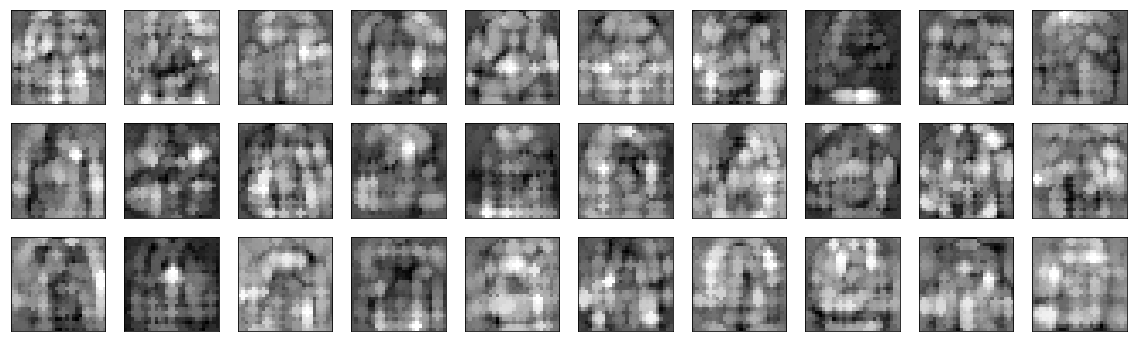

In [7]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 2. 6 channels input: repeating the image

In [6]:
pd.read_csv("../ShallowAE/SeveralChannels/NoAMD/Simple/TestOutputs/18_08_02results")

,Unnamed: 0,SVM_best_C,SVM_best_gamma,SVM_classification_score,dimension,test_error,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_error,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,5.994843,0.16681,0.857,100,0.00748,11.667375,11.758431,0.094687,0.007401,11.663186,11.75367,0.094987


In [7]:
x_small = np.tile(x_small, (1,1,1,6))

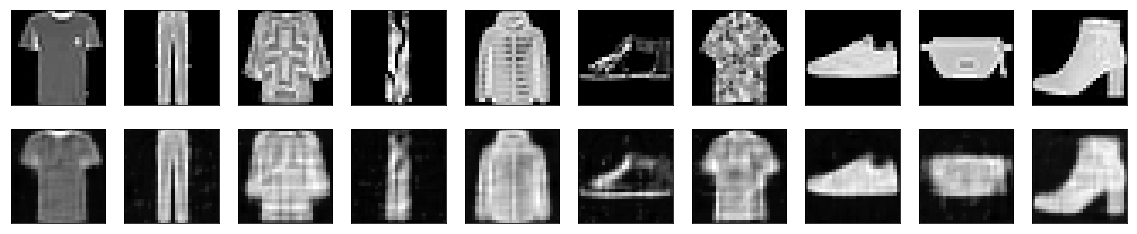

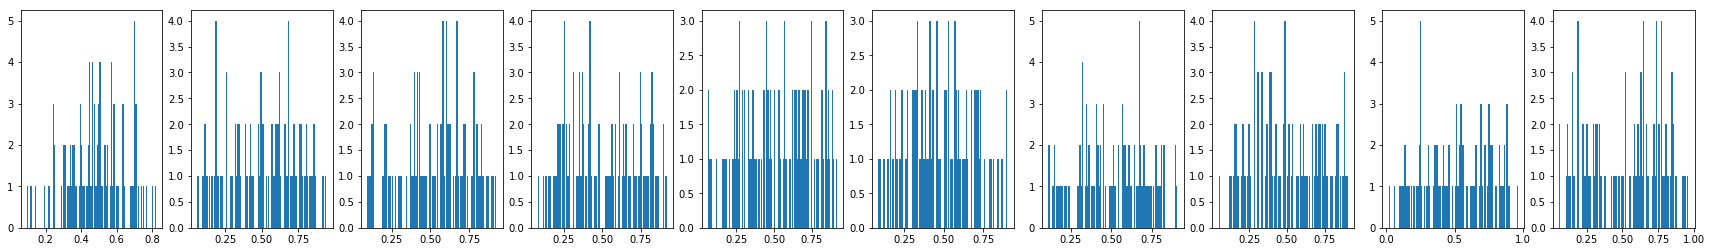

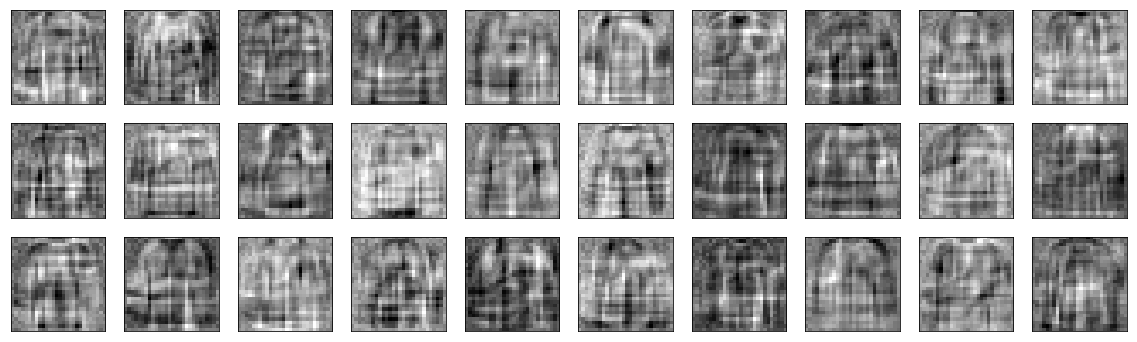

In [8]:
AE = ShallowAE.load('18_08_02_dim100.h5', path_to_model_directory="../ShallowAE/SeveralChannels/NoAMD/")
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

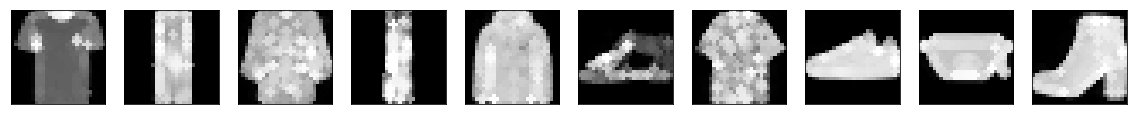

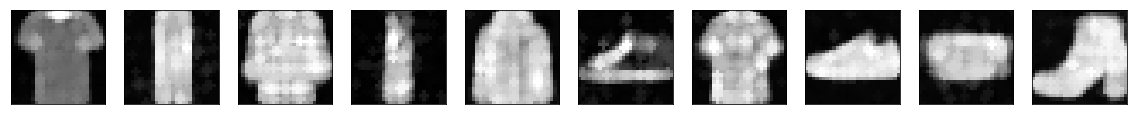

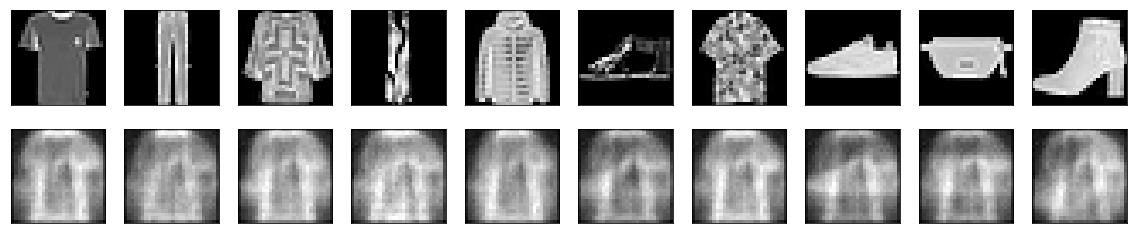

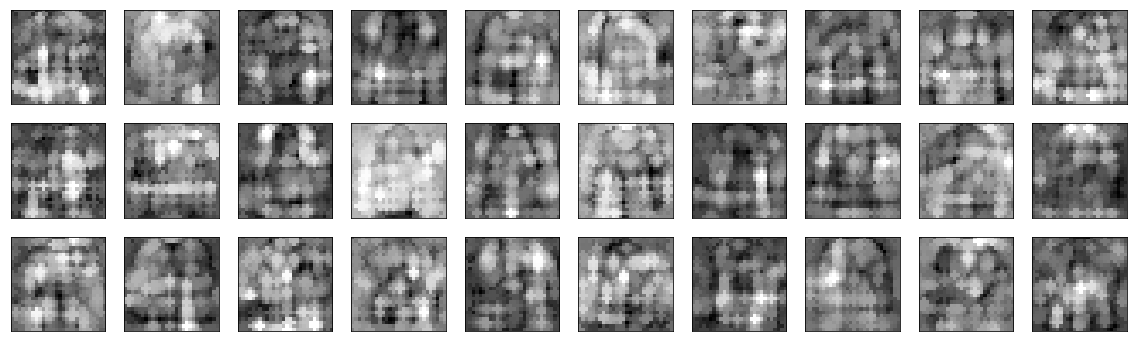

In [9]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 3. 6 channels input: AMD

In [10]:
pd.read_csv("../ShallowAE/SeveralChannels/WithAMD/Simple/TestOutputs/18_08_02results")

,Unnamed: 0,SVM_best_C,SVM_best_gamma,SVM_classification_score,dimension,test_error,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_error,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,1.668101,0.599484,0.867,100,0.008109,12.639934,12.758605,0.079267,0.00804,12.643332,12.760289,0.079528


In [11]:
x_small = morphoMaths.AMD_in_one_array(x_small[:,:,:,0], levels=4, step=1, init_step=1)

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

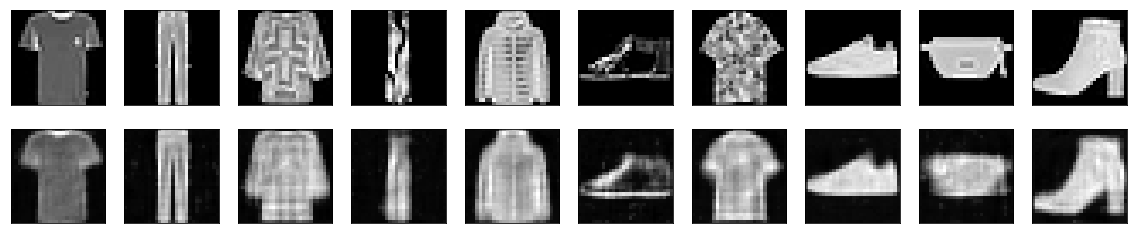

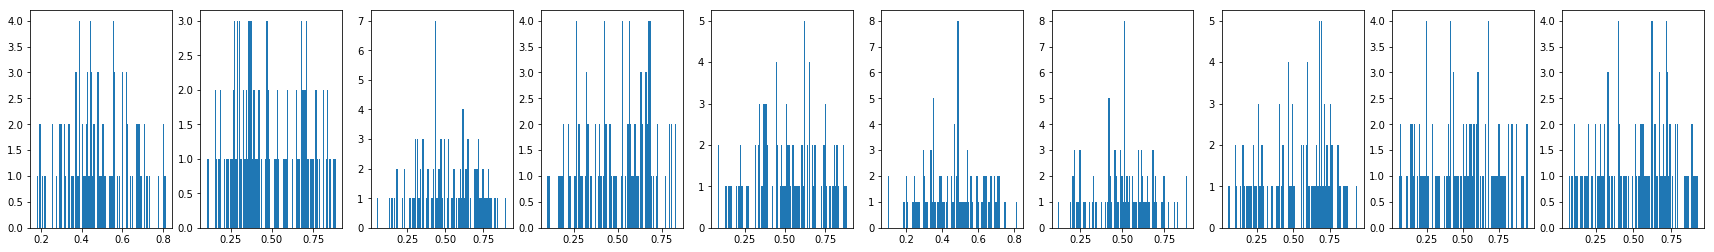

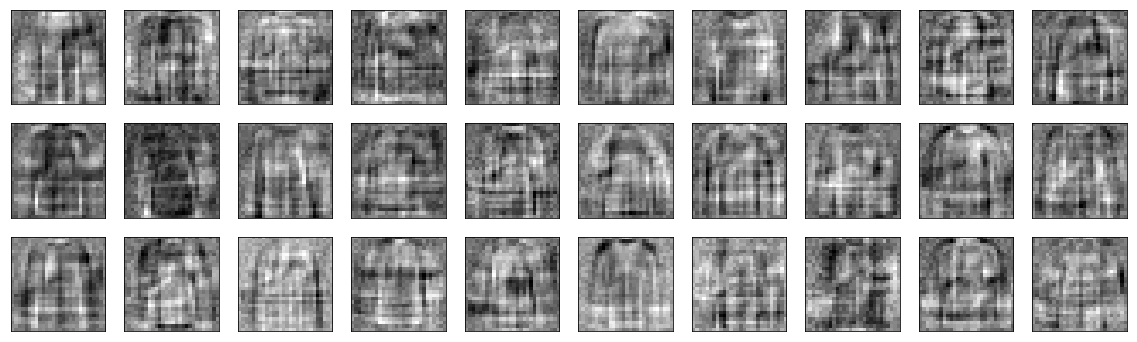

In [12]:
AE = ShallowAE.load('18_08_02_dim100.h5', path_to_model_directory="../ShallowAE/SeveralChannels/WithAMD/")
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

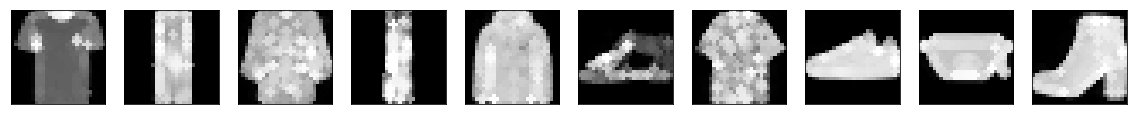

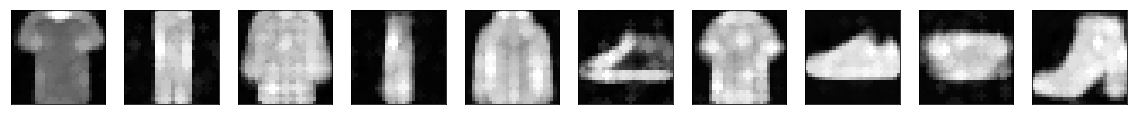

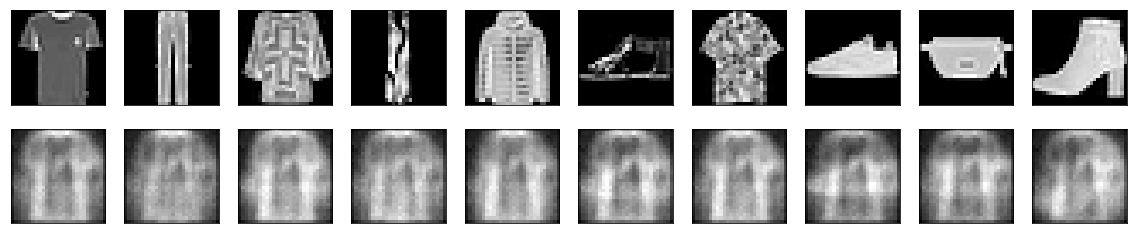

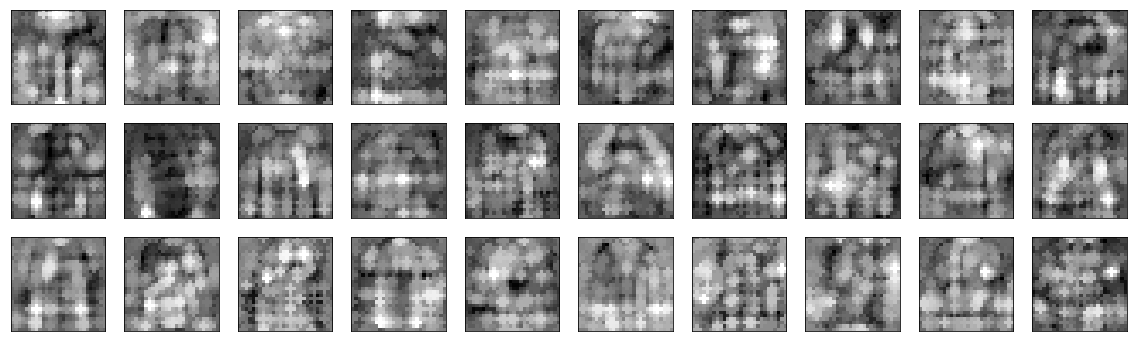

In [13]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

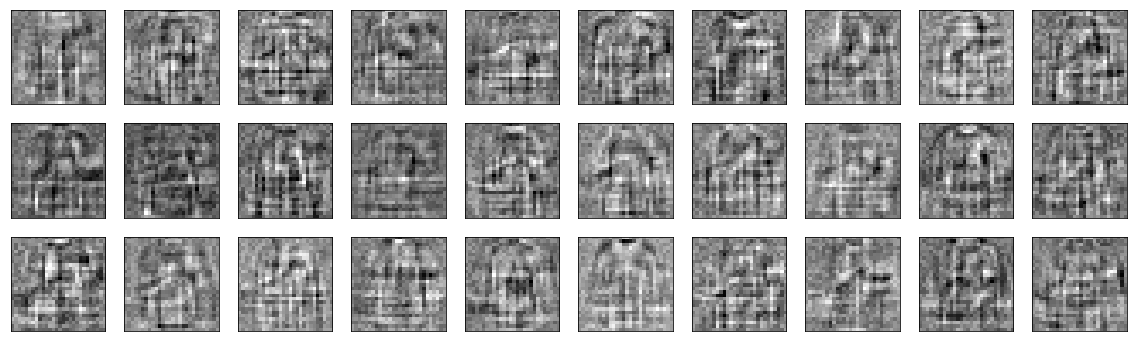

In [14]:
AE.plot_atoms_encoder(channel_to_plot=0, nb_to_plot=30, normalize=False)

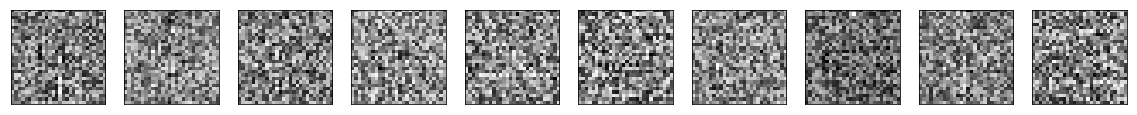

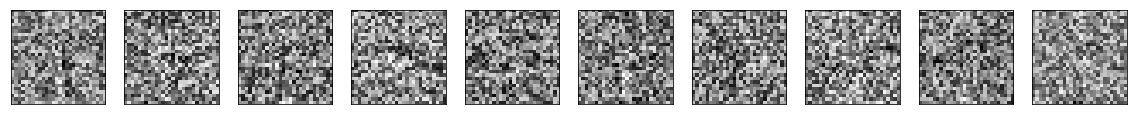

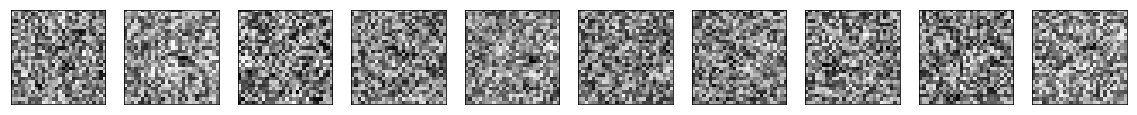

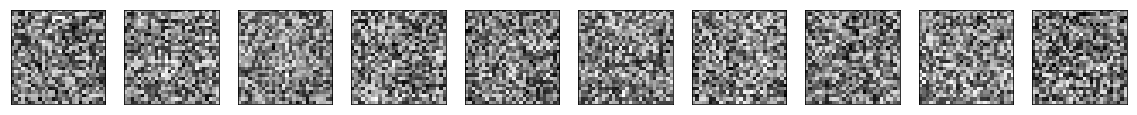

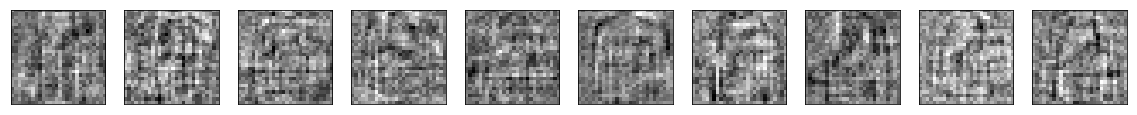

In [15]:
AE.plot_atoms_encoder(channel_to_plot=1, nb_to_plot=10, normalize=False)
AE.plot_atoms_encoder(channel_to_plot=2, nb_to_plot=10, normalize=False)
AE.plot_atoms_encoder(channel_to_plot=3, nb_to_plot=10, normalize=False)
AE.plot_atoms_encoder(channel_to_plot=4, nb_to_plot=10, normalize=False)
AE.plot_atoms_encoder(channel_to_plot=5, nb_to_plot=10, normalize=False)

**Les résidus ne sont pas utilisés ! ! !**

In [7]:
x_small = morphoMaths.AMD_in_one_array(x_small[:,:,:,0])

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

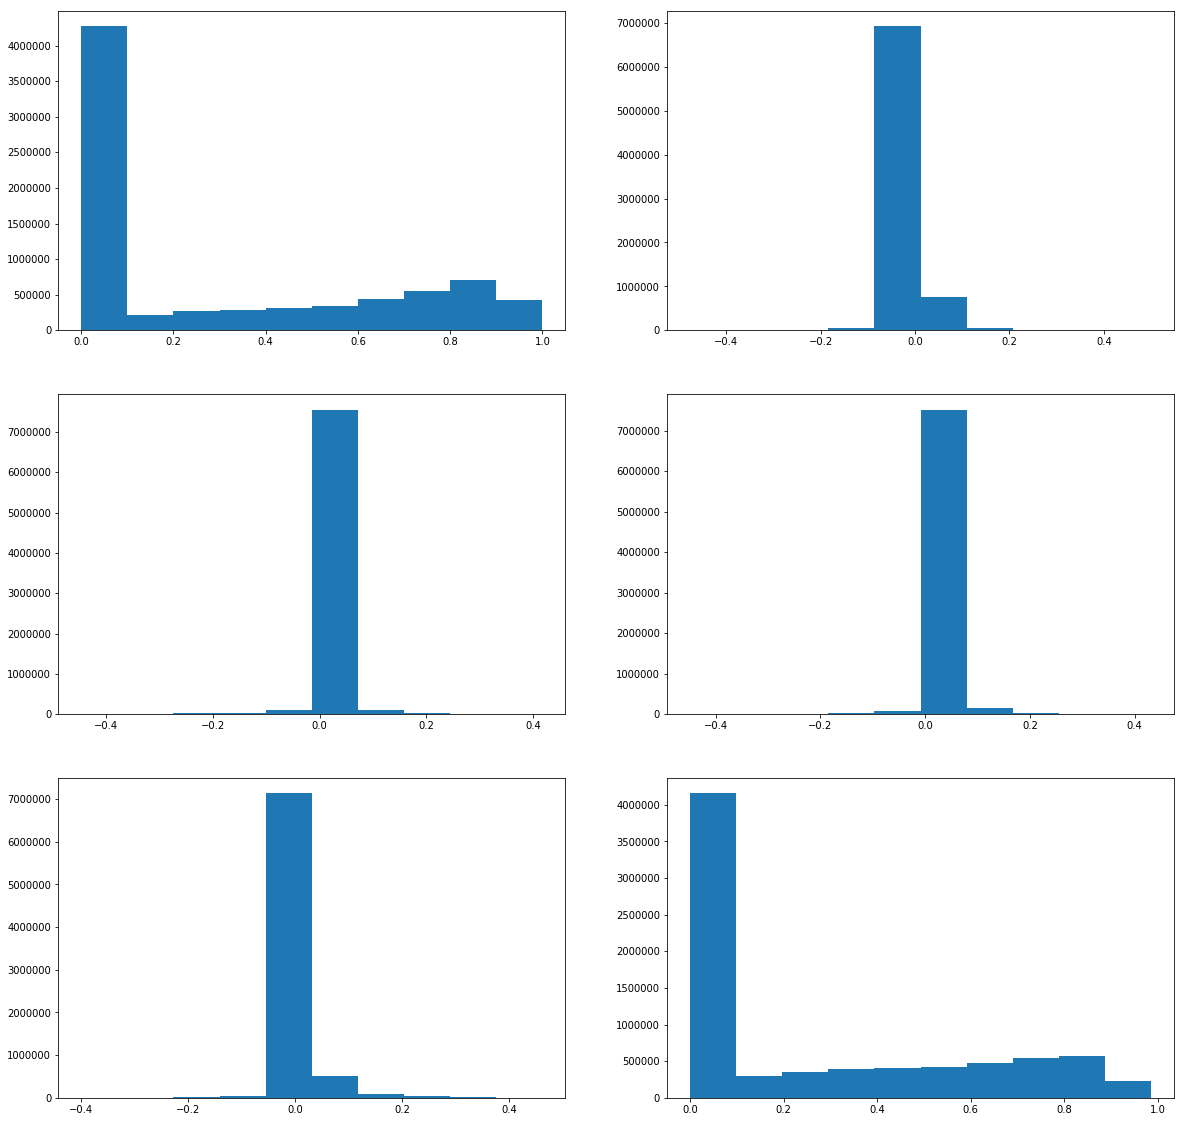

In [49]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20,20))
ax1.hist(x_test[:,:,:,0].flatten())
ax2.hist(x_test[:,:,:,1].flatten())
ax3.hist(x_test[:,:,:,2].flatten())
ax4.hist(x_test[:,:,:,3].flatten())
ax5.hist(x_test[:,:,:,4].flatten())
ax6.hist(x_test[:,:,:,5].flatten())
plt.show()

In [11]:
from sklearn import preprocessing

In [13]:
x_test, _ = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=False)
x_test = morphoMaths.AMD_in_one_array(x_test[:,:,:,0], levels=4, step=1, init_step=1)

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

In [12]:
def preprocess_all_channels(X):
    x_prep = np.copy(X)
    nb_samples, nb_rows, nb_columns, nb_channels = X.shape
    for j in range(nb_channels):
        min_max_scaler = preprocessing.MinMaxScaler()
        x_prep[:,:,:,j] = min_max_scaler.fit_transform(X[:,:,:,j].reshape((nb_samples, nb_rows*nb_columns))).reshape((nb_samples, nb_rows, nb_columns))
    return x_prep

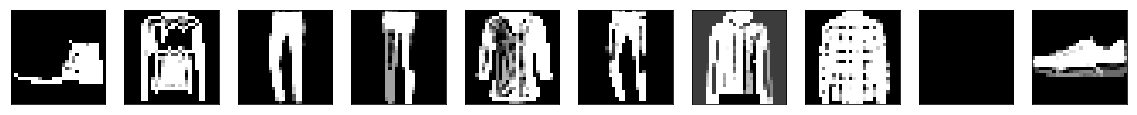

In [42]:
bastien_utils.plot_all_images(x_test[:10], channel_to_plot=4)

In [14]:
x_test_prep = preprocess_all_channels(x_test)

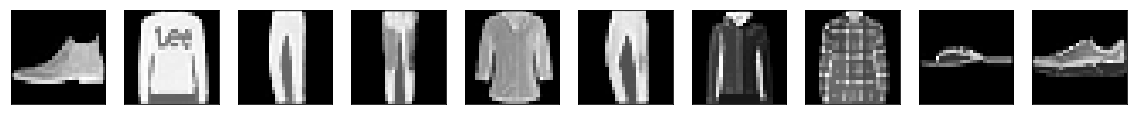

In [63]:
bastien_utils.plot_all_images(x_test_prep[:10], channel_to_plot=5)

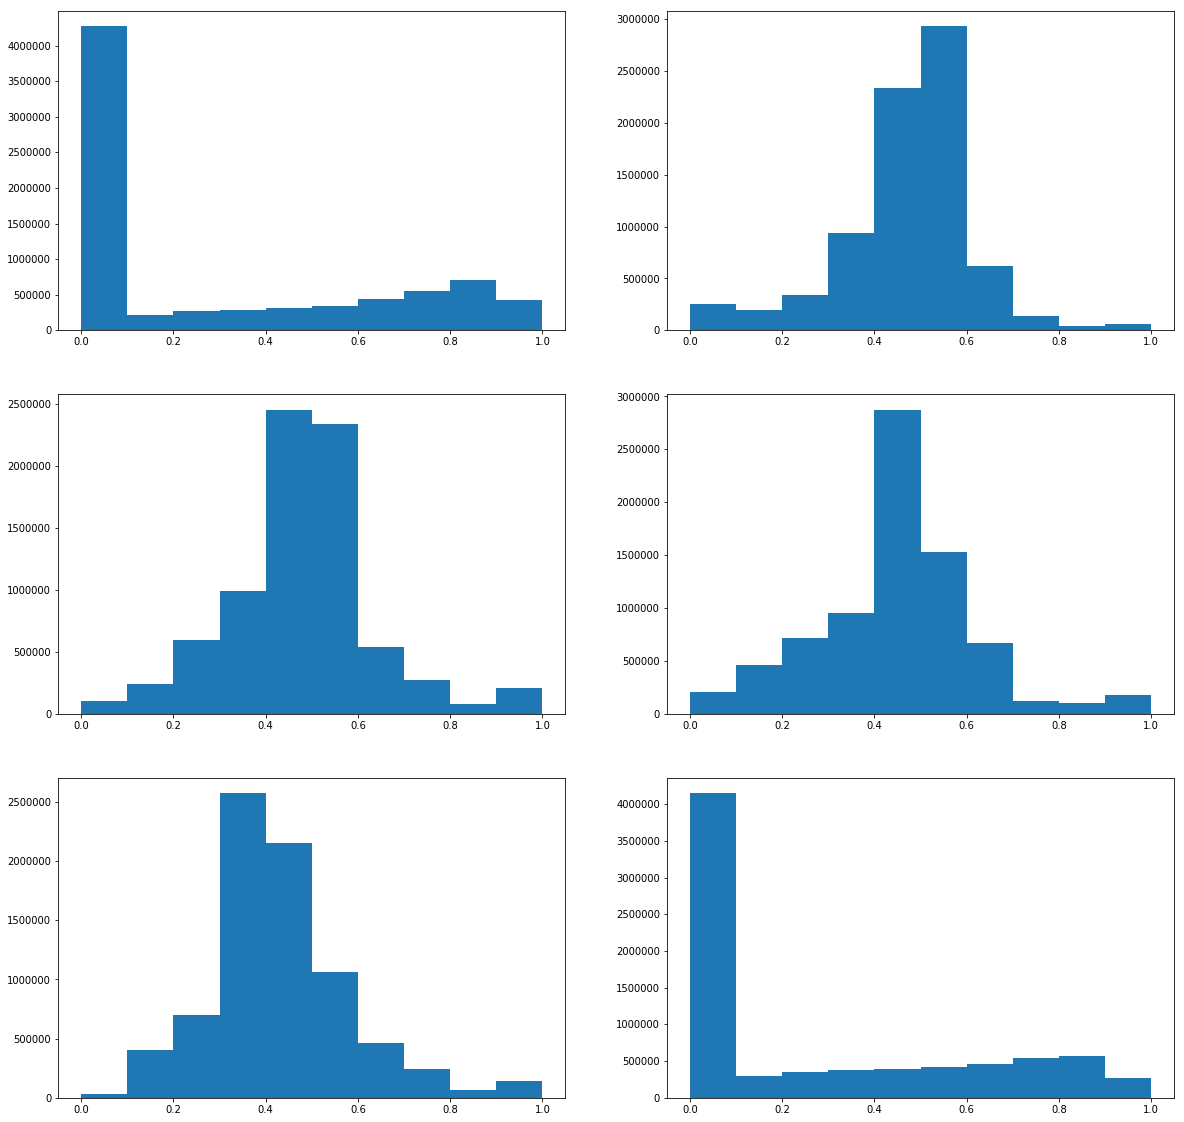

In [50]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20,20))
ax1.hist(x_test_prep[:,:,:,0].flatten())
ax2.hist(x_test_prep[:,:,:,1].flatten())
ax3.hist(x_test_prep[:,:,:,2].flatten())
ax4.hist(x_test_prep[:,:,:,3].flatten())
ax5.hist(x_test_prep[:,:,:,4].flatten())
ax6.hist(x_test_prep[:,:,:,5].flatten())
plt.show()

In [18]:
from skimage import exposure

In [89]:
def rescale_all_channels_between_0_and_1(X):
    x_prep = np.copy(X)
    nb_samples, nb_rows, nb_columns, nb_channels = X.shape
    max_per_channel = np.max(X, axis=(0,1,2))
    min_per_channel = np.min(X, axis=(0,1,2))
    for j in range(nb_channels):
        in_min = min_per_channel[j]
        in_max = max_per_channel[j]
        for i in range(nb_samples):
            x_prep[i,:,:,j] = exposure.rescale_intensity(X[i,:,:,j], in_range=(in_min, in_max), out_range=(0, 1))
    return x_prep

In [25]:
x_test_prep2 = rescale_all_channels_between_0_and_1(x_test)

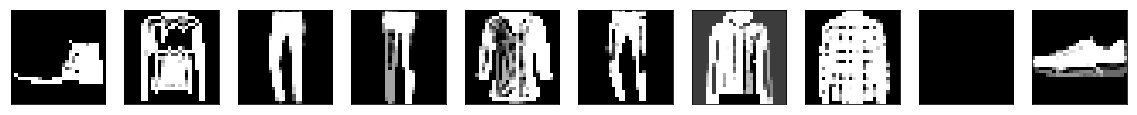

In [40]:
bastien_utils.plot_all_images(x_test_prep2[:10], channel_to_plot=4)

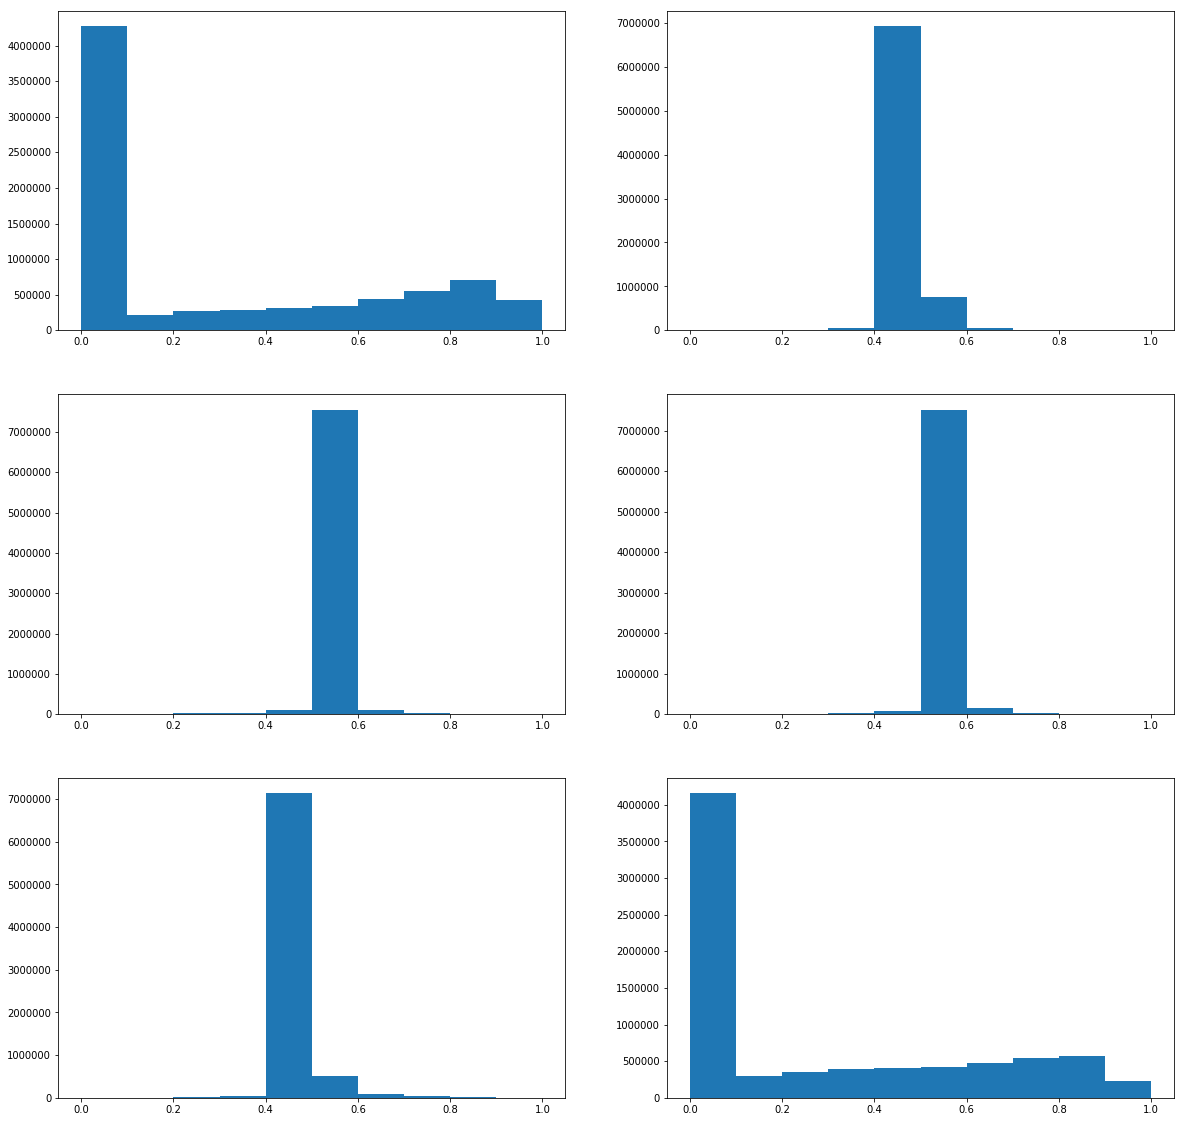

In [48]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20,20))
ax1.hist(x_test_prep2[:,:,:,0].flatten())
ax2.hist(x_test_prep2[:,:,:,1].flatten())
ax3.hist(x_test_prep2[:,:,:,2].flatten())
ax4.hist(x_test_prep2[:,:,:,3].flatten())
ax5.hist(x_test_prep2[:,:,:,4].flatten())
ax6.hist(x_test_prep2[:,:,:,5].flatten())
plt.show()

In [129]:
def robust_scaling(X):
    x_prep = np.copy(X)
    nb_samples, nb_rows, nb_columns, nb_channels = X.shape
    for j in range(nb_channels):
        min_max_scaler = preprocessing.RobustScaler(quantile_range=(0.0, 1.0))
        x_prep[:,:,:,j] = min_max_scaler.fit_transform(X[:,:,:,j].reshape((nb_samples, nb_rows*nb_columns))).reshape((nb_samples, nb_rows, nb_columns))
    return x_prep

In [130]:
x_test_prep3 = robust_scaling(x_test)

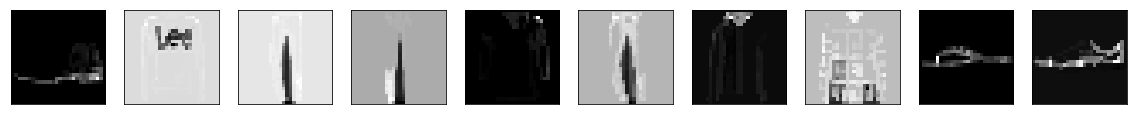

In [131]:
bastien_utils.plot_all_images(x_test_prep3[:10], channel_to_plot=2)

In [87]:
x_small = morphoMaths.AMD_in_one_array(x_small[:,:,:,0], levels=10, step=1, init_step=1)

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

# 4. AMD normalisé entre 0 et 1, sans l'image originale



**I used skimage.exposure.rescale method to rescale each image from (min_ch, max_ch) to (0,1), with min_ch and max_ch being respectively the minimum and maximum on all pixels of all images of the channel the image belongs to.**

**Sklearn min_max_scaler could also have been used, but it rescales each pixel from (min_px_ch, max_px_ch) to (0,1) where min_px_ch and max_px_ch are respectively the minimum and maximum value of each pixel on all images of the current channel. This methods induce a loss of spatial information as all pixels of an image are rescaled independantly from each other.**

In [4]:
pd.read_csv("../ShallowAE/SeveralChannels/WithAMD_NoOriginals/Simple/TestOutputs/18_08_07results")

,Unnamed: 0,SVM_best_C,SVM_best_gamma,SVM_classification_score,dimension,test_error,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_error,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,5.994843,0.16681,0.872,100,0.00842,17.48518,17.774472,0.081302,0.008278,17.426223,17.699399,0.081314


In [3]:
x_small_AMD=morphoMaths.AMD_in_one_array(x_small[:,:,:,0], add_original_images=False)

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

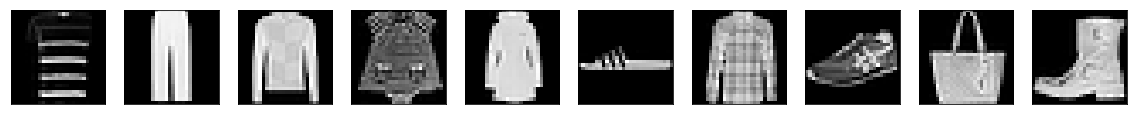

In [4]:
bastien_utils.plot_all_images(x_small)

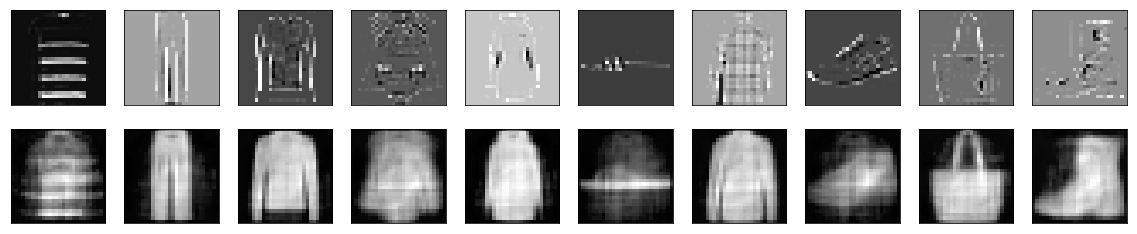

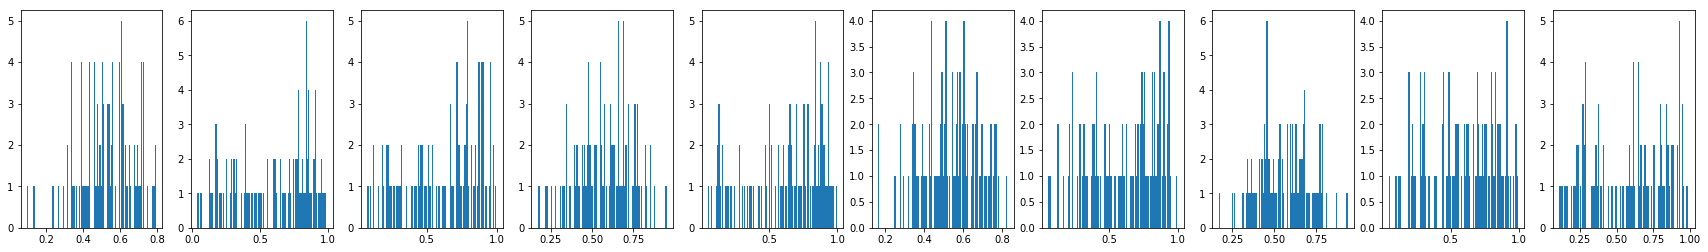

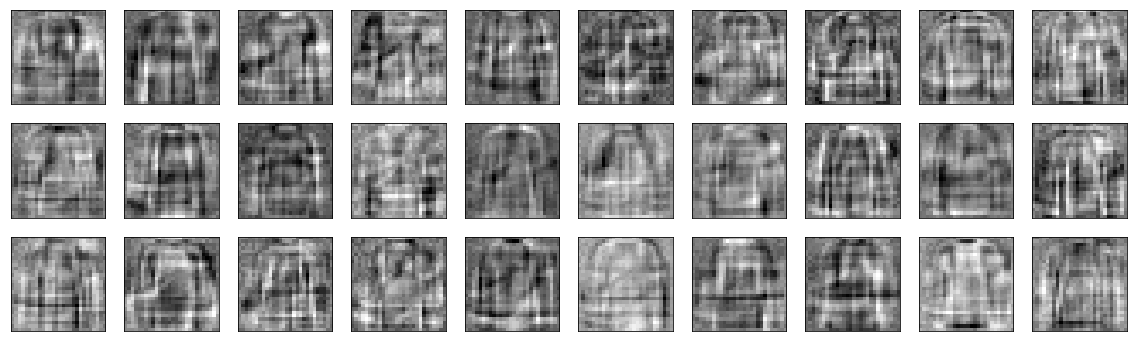

In [5]:
AE = ShallowAE.load('18_08_07_dim100.h5', path_to_model_directory="../ShallowAE/SeveralChannels/WithAMD_NoOriginals/")
AE.plot_reconstructions(x_small_AMD)
AE.plot_histograms_of_the_encoding(x_small_AMD)
AE.plot_atoms_decoder(nb_to_plot=30)

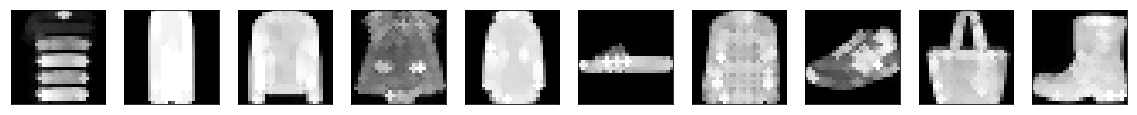

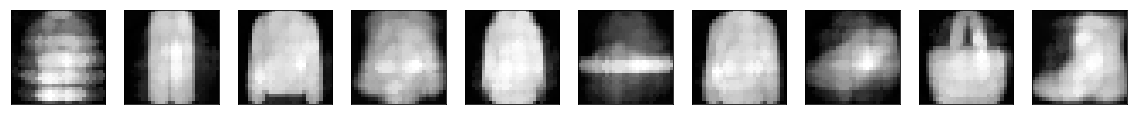

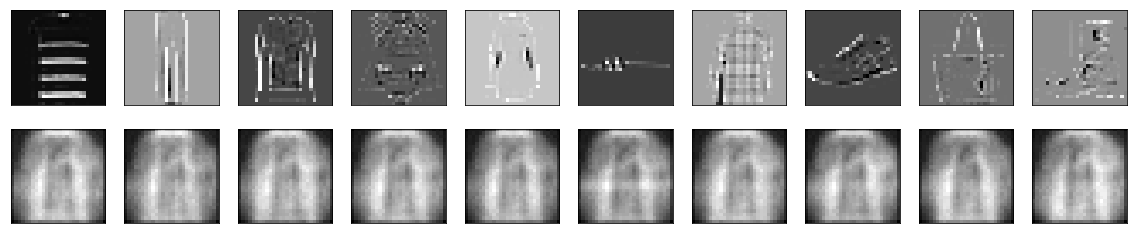

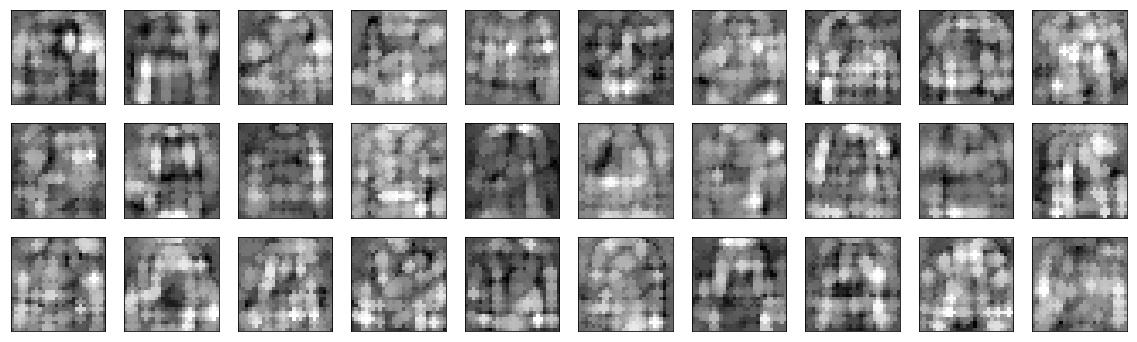

In [6]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_AMD), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small_AMD)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

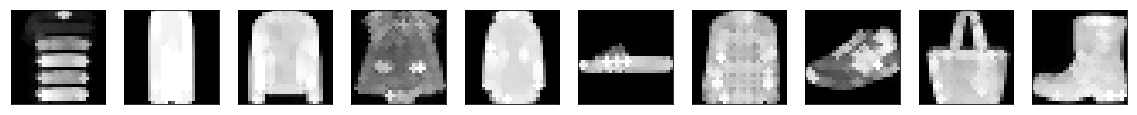

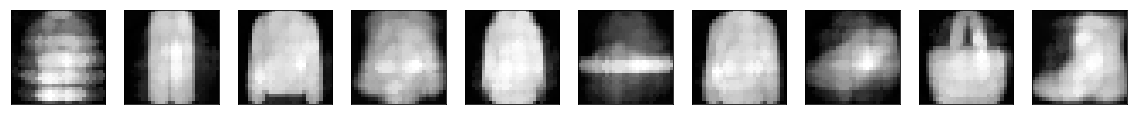

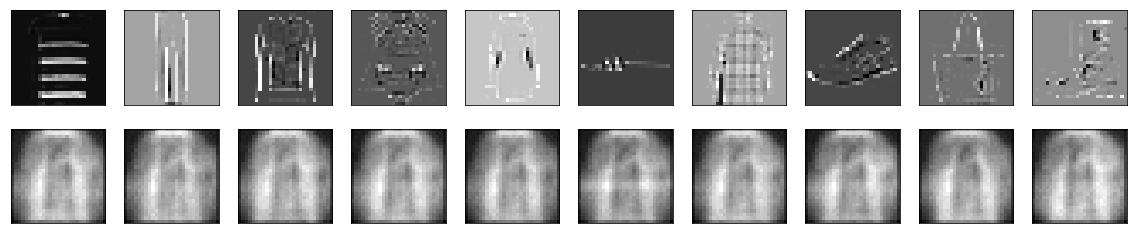

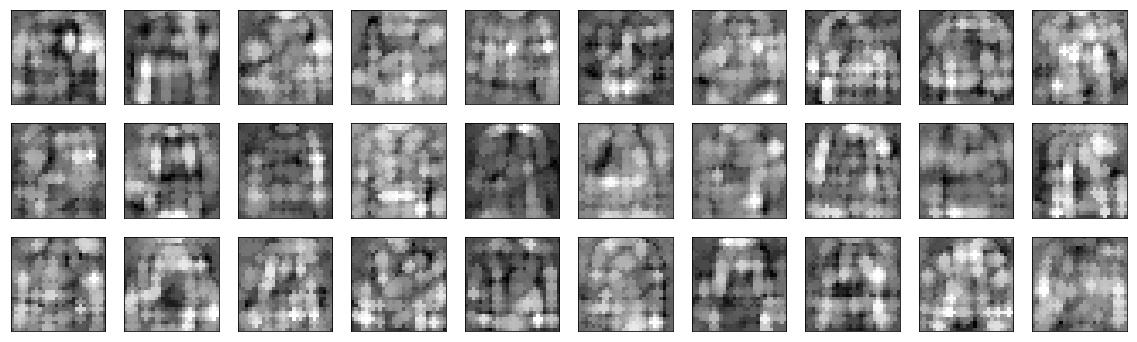

In [16]:
# Same cell as above but without applying the dilatation to the biais
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_AMD), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
AE_dil.plot_reconstructions(x_small_AMD)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

**Applying the dilatation to the biais or not does not seam to have a great impact**

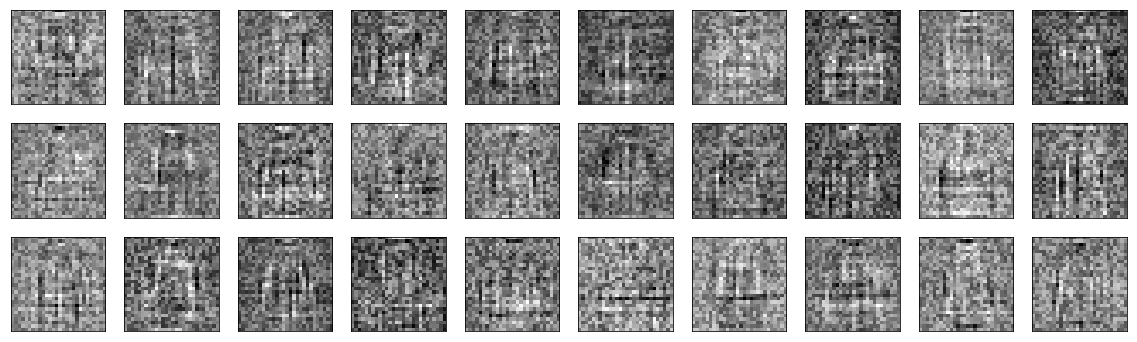

In [14]:
AE.plot_atoms_encoder(channel_to_plot=0, nb_to_plot=30, normalize=False)

**Once again, the structures seams to be much more used than the residues information**

In [3]:
AE = ShallowAE.load('18_08_07_dim100.h5', path_to_model_directory="../ShallowAE/SeveralChannels/WithAMD_NoOriginals/")

In [4]:
AE.nb_input_channels

5